<a href="https://colab.research.google.com/github/scottvcaputo/Neural-Style-Transfer/blob/master/fast_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Neural Network Style Transfer**

#Fast Style Transfer

In [1]:
#@title Copyright 2019 The TensorFlow Hub Authors. All Rights Reserved.
# Copyright 2019 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

Based on the model code in [magenta](https://github.com/tensorflow/magenta/tree/master/magenta/models/arbitrary_image_stylization) and the publication:

[Exploring the structure of a real-time, arbitrary neural artistic stylization
network](https://arxiv.org/abs/1705.06830).
*Golnaz Ghiasi, Honglak Lee,
Manjunath Kudlur, Vincent Dumoulin, Jonathon Shlens*,
Proceedings of the British Machine Vision Conference (BMVC), 2017.


Additonal information can be viewed at the model code this is based on here:

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/tf2_arbitrary_image_stylization.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/hub/blob/master/examples/colab/tf2_arbitrary_image_stylization.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
<!--    <a href="https://storage.googleapis.com/tensorflow_docs/hub/examples/colab/tf2_arbitrary_image_stylization.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td> -->
</table>

# Fast Neural Network Style Transfer

Based on the model code in [magenta](https://github.com/tensorflow/magenta/tree/master/magenta/models/arbitrary_image_stylization) and the publication:

[Exploring the structure of a real-time, arbitrary neural artistic stylization
network](https://arxiv.org/abs/1705.06830).
*Golnaz Ghiasi, Honglak Lee,
Manjunath Kudlur, Vincent Dumoulin, Jonathon Shlens*,
Proceedings of the British Machine Vision Conference (BMVC), 2017.


# Setup & Initialization

> importing packages and modules



> Configuration




> selecting style and content images

### **Functools**
module provides tools for working with functions and other callable objects, to adapt or extend them for new purposes without completely rewriting them.


---
### **OS**
The OS module in Python provides a way of using operating system dependent functionality.

The functions that the OS module provides allows you to interface with the underlying operating system that Python is running on – be that Windows, Mac or Linux.

In [2]:
import functools
import os

### **Matplotlib** 
is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits



---



### **matplotlib.pyplot** 
is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that "axes" here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).


---

### **GridSpec**
specifies the geometry of the grid that a subplot will be placed. The number of rows and number of columns of the grid need to be set. Optionally, the subplot layout parameters (e.g., left, right, etc.) can be tuned.






### **NumPy**
 is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays

### **TensorFlow Hub** 
is a library for the publication, discovery, and consumption of reusable parts of machine learning models. A module is a self-contained piece of a TensorFlow graph, along with its weights and assets, that can be reused across different tasks in a process known as transfer learning. Transfer learning can:
Train a model with a smaller dataset,
Improve generalization, and
Speed up training.

In [3]:
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

Displaying versions and Google Colab environment

In [4]:
print("TF Version: ", tf.__version__)
print("TF-Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())

TF Version:  2.3.0
TF-Hub version:  0.9.0
Eager mode enabled:  True


In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#Image loading, Initialization, & Visualization

When crop_center is called, it returns a cropped square image 


> There are other methods of controlling the size of the image but can sometimes run into problems when converting the images numerical information into tensors for the neural network. Because this project simply needs to process the style of the overall artwork it is not necessary. 

Shape is defined using the shape of the image submitted. This is followed by the resizing of the image using offset_y and offset_x where the image is cropping is scaled along both the *x* and *y* axis.


---

tf.image.crop_to_bounding_box(

    image, offset_height, offset_width, target_height, target_width
)



In [6]:
def crop_center(image):
  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

Here we are loading and preprocessing the images.


---



@functools.lru_cache(maxsize=None)

> Decorator to wrap a function with a memoizing callable that saves up to the maxsize most recent calls. It can save time when an expensive or I/O bound function is periodically called with the same arguments. Since a dictionary is used to cache results, the positional and keyword arguments to the function must be hashable.

> If maxsize is set to None, the LRU feature is disabled and the cache can grow without bound. The LRU feature performs best when maxsize is a power-of-two.

> An LRU (least recently used) cache works best when the most recent calls are the best predictors of upcoming calls (for example, the most popular articles on a news server tend to change each day). The cache’s size limit assures that the cache does not grow without bound on long-running processes such as web servers.


---
Here the function is calling the image file using '*tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)*' caching the file locally in order to be used in the model. 


---
The function loads the image in and coverts it to a float32 numpy array to be computationally readable for the model. The batch dimensions are set and the range [0, 1] is normalized. 


---
plt.imread(image_path).astype(np.float32)[np.newaxis, ...]



> essentially says matplotlib.imread(*our_selected_image*)


> This method will return the image data in the form of a numpy.array where it is 

    (M,N) for grayscale
    (M, N, 3) for RGB images
    (M, N, 4) for RGBA images

.astype()[np.newaxis, ...]


> **Syntax**: DataFrame.astype(dtype, copy=True, errors=’raise’, **kwargs)

> **dtype** : Use a numpy.dtype or Python type to cast entire pandas object to the same type. Alternatively, use {col: dtype, …}, where col is a column label and dtype is a numpy.dtype or Python type to cast one or more of the DataFrame’s columns to column-specific types.

This allows you to convert the newly obtained numerical data into a numpy float32. 


> np.new axis is important in the controll of dimensional complexity. Here, it is used to increase the dimension by one, converting the 1D array we've just made into row/ column vector. This is responsible for adding the batch dimension. 



---
The numerical information extracted from the images is then normalized to be on a scale of 1.

The length pertains to the dimensional complexity of a given image since each RGB is responsible for its own dimensional channel in the givne architecture of the neural network. 


---
Finally, the image is cropped and resized using the function crated above to ensure the size data/ image can be input into the model. 

tf.image.resize(
  
    images, size, method=ResizeMethod.BILINEAR, preserve_aspect_ratio=False,
    antialias=False, name=None
)



> **preserve_aspect_ratio**:	Whether to preserve the aspect ratio. If this is set, then images will be resized to a size that fits in size while preserving the aspect ratio of the original image. Scales up the image if size is bigger than the current size of the image. Defaults to False.















In [7]:
@functools.lru_cache(maxsize=None)
def load_image(image_url, image_size=(256, 256), preserve_aspect_ratio=True):
  
  # Cache image file locally.
  image_path = tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)

  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img = plt.imread(image_path).astype(np.float32)[np.newaxis, ...]
  if img.max() > 1.0:
    img = img / 255.
  if len(img.shape) == 3:
    img = tf.stack([img, img, img], axis=-1)
  img = crop_center(img)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return img

This function is primarily for presentation. It allows the viewer to observe the results of the model. 

The titles parameter is written as such to accept strings for as titles as necessary to present each image.

The for loop displays n images on a matplotlib subplot 

The width is defined using the normalized image width/ x-axis length scaled 


---
'gs' is the gridspec the plot is placed on as shown below 

.gridspec.GridSpec()


> Call signatures:

    (nrows, ncols, figure=None, left=None, bottom=None, right=None,
    top=None, wspace=None, hspace=None, width_ratios=None, height_ratios=None)
    [source]plt)

---
plt.subplot()
> Call signatures:

    subplot(nrows, ncols, index, **kwargs)
    subplot(pos, **kwargs)
    subplot(ax)





In [8]:
def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w  * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  plt.show()

This is primarily to display the concepts of the code above, allowing the user to understand how the model works. The content_img_size is defined by the output_image_size selected while the style_img_size is held constant at (256, 256). 


---


Note: The style prediction model was trained with image size 256


> That being said, the model will still effectively run on other content image sizes. This allows for different sizes to yeild slightly different results.




---
An original attempt at this in the VGG16 & VGG19 model aimed to create a deep neural network (16 layers deep, 19 layers deep) where the model used *max pooling*. It was later found to be slightly more effective using *average pooling* on this particular type of model. 



---
tf.nn.avg_pool(

    input, ksize, strides, padding, data_format=None, name=None
)

input	
> Tensor of rank N+2, of shape [batch_size] + input_spatial_shape + [num_channels] if data_format does not start with "NC" (default), or [batch_size, num_channels] + input_spatial_shape if data_format starts with "NC". Pooling happens over the spatial dimensions only.

ksize	
> An int or list of ints that has length 1, N or N+2. The size of the window for each dimension of the input tensor.

strides	
> An int or list of ints that has length 1, N or N+2. The stride of the sliding window for each dimension of the input tensor.

padding	
> A string, either 'VALID' or 'SAME'. The padding algorithm. See the "returns" section of tf.nn.convolution for details.




2686976/2684586 [==============================] - 0s 0us/step


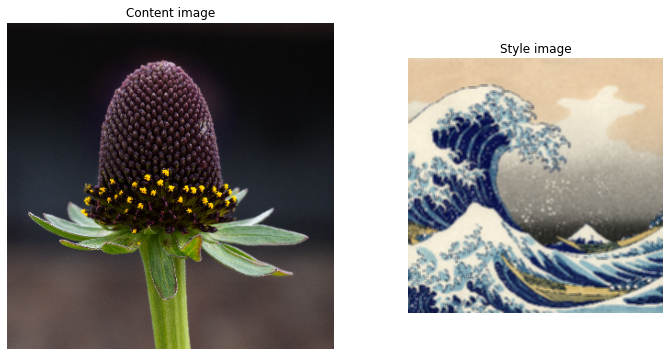

In [9]:
# @title Load example images  { display-mode: "form" }

content_image_url = 'https://upload.wikimedia.org/wikipedia/commons/e/e0/Rudbeckia_occidentalis_on_Aspen_Mountain_%2891134%29.jpg'  # @param {type:"string"}
style_image_url = 'https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg'  # @param {type:"string"}
output_image_size =   356# @param {type:"integer"}

# The content image size can be arbitrary.
content_img_size = (output_image_size, output_image_size)
# The style prediction model was trained with image size 256 and it's the 
# recommended image size for the style image (though, other sizes work as 
# well but will lead to different results).

style_img_size = (256, 256)  

content_image = load_image(content_image_url, content_img_size)
style_image = load_image(style_image_url, style_img_size)
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')
show_n([content_image, style_image], ['Content image', 'Style image'])

# Importing the Tensorflow-HUB module

###Overview of the HUB

> The original work for artistic style transfer with neural networks proposed a slow optimization algorithm that works on any arbitrary painting. Subsequent work developed a method for fast artistic style transfer that may operate in real time, but was limited to one or a limited set of styles.

> This module performs fast artistic style transfer that may work on arbitrary painting styles

In [10]:
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

## Demonstrate image stylization

This cell builds off of the interactive input demonstration cell

> This will run the HUB model on the content image and style image provided 

In [11]:
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

Responsible for visualizing the result using the show_n funciton

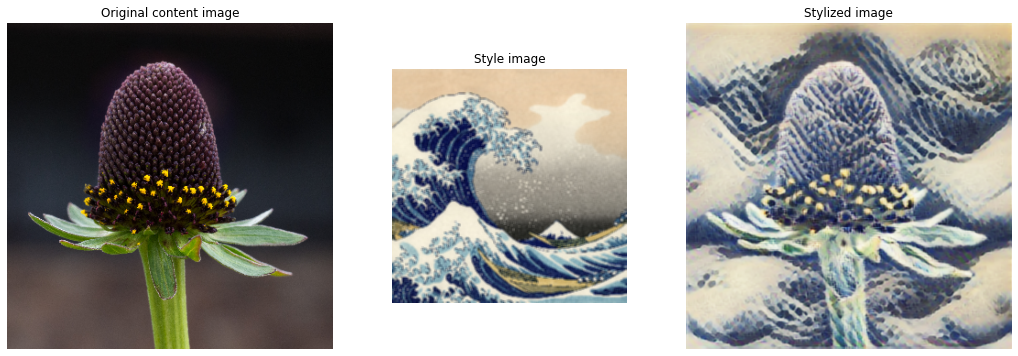

In [12]:
show_n([content_image, style_image, stylized_image], titles=['Original content image', 'Style image', 'Stylized image'])

# Expanding the Model

##Build a library of content & style images


### Content Library

In [13]:
content_urls = dict(
  mountains= 'https://upload.wikimedia.org/wikipedia/commons/3/38/Eisriesenwelt%2C_Macizos_de_Tennen%2C_Austria%2C_2019-05-18%2C_DD_58.jpg',
  rudbeckia= 'https://upload.wikimedia.org/wikipedia/commons/e/e0/Rudbeckia_occidentalis_on_Aspen_Mountain_%2891134%29.jpg',
  probiscis_monkey= 'https://upload.wikimedia.org/wikipedia/commons/5/5a/Proboscis_monkey_%28Nasalis_larvatus%29_female_Labuk_Bay.jpg',
  baby_elephant= 'https://upload.wikimedia.org/wikipedia/commons/4/45/African_Elephant_Baby_Walk_2019-07-23.jpg',
  hoodoos= 'https://upload.wikimedia.org/wikipedia/commons/4/4d/Hoodoos_in_the_Bryce_Canyon_National_Park.jpg',
  antelope_canyon= 'https://upload.wikimedia.org/wikipedia/commons/9/95/Lower_Antelope_Canyon_November_2018_017.jpg',
  golden_gate= 'https://upload.wikimedia.org/wikipedia/commons/5/54/Golden_gate_of_Ueno_T%C5%8Dsh%C5%8D-g%C5%AB_Shinto_shrine%2C_Tokyo%2C_Japan.jpg',
  )

### Style Library

In [14]:
style_urls = dict(
  kanagawa_great_wave='https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg',
  kandinsky_composition_7='https://upload.wikimedia.org/wikipedia/commons/b/b4/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg',
  hubble_pillars_of_creation='https://upload.wikimedia.org/wikipedia/commons/6/68/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg',
  van_gogh_starry_night='https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg',
  turner_nantes='https://upload.wikimedia.org/wikipedia/commons/b/b7/JMW_Turner_-_Nantes_from_the_Ile_Feydeau.jpg',
  munch_scream='https://upload.wikimedia.org/wikipedia/commons/c/c5/Edvard_Munch%2C_1893%2C_The_Scream%2C_oil%2C_tempera_and_pastel_on_cardboard%2C_91_x_73_cm%2C_National_Gallery_of_Norway.jpg',
  picasso_demoiselles_avignon='https://upload.wikimedia.org/wikipedia/en/4/4c/Les_Demoiselles_d%27Avignon.jpg',
  picasso_violin='https://upload.wikimedia.org/wikipedia/en/3/3c/Pablo_Picasso%2C_1911-12%2C_Violon_%28Violin%29%2C_oil_on_canvas%2C_Kr%C3%B6ller-M%C3%BCller_Museum%2C_Otterlo%2C_Netherlands.jpg',
  picasso_bottle_of_rum='https://upload.wikimedia.org/wikipedia/en/7/7f/Pablo_Picasso%2C_1911%2C_Still_Life_with_a_Bottle_of_Rum%2C_oil_on_canvas%2C_61.3_x_50.5_cm%2C_Metropolitan_Museum_of_Art%2C_New_York.jpg',
  fire='https://upload.wikimedia.org/wikipedia/commons/3/36/Large_bonfire.jpg',
  derkovits_woman_head='https://upload.wikimedia.org/wikipedia/commons/0/0d/Derkovits_Gyula_Woman_head_1922.jpg',
  amadeo_style_life='https://upload.wikimedia.org/wikipedia/commons/8/8e/Untitled_%28Still_life%29_%281913%29_-_Amadeo_Souza-Cardoso_%281887-1918%29_%2817385824283%29.jpg',
  derkovtis_talig='https://upload.wikimedia.org/wikipedia/commons/3/37/Derkovits_Gyula_Talig%C3%A1s_1920.jpg',
  amadeo_cardoso='https://upload.wikimedia.org/wikipedia/commons/7/7d/Amadeo_de_Souza-Cardoso%2C_1915_-_Landscape_with_black_figure.jpg',
  picasso_portrait= 'https://upload.wikimedia.org/wikipedia/commons/1/18/Juan_Gris_-_Portrait_of_Pablo_Picasso_-_Google_Art_Project.jpg', 
  mona_lisa= 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg', 
  shipreck= 'https://upload.wikimedia.org/wikipedia/commons/5/5d/William_Joy_-_Shipwreck%2C_the_sun_breaking_through_the_clouds_after_the_storm.jpg',
  rustic_japan= 'https://upload.wikimedia.org/wikipedia/commons/e/e2/Khalili_Collections_A_Composite_Imaginary_View_of_Japan.jpg',
)

Formatting the image sizes before being input to the model

In [15]:
content_image_size = 384
style_image_size = 256
content_images = {k: load_image(v, (content_image_size, content_image_size)) for k, v in content_urls.items()}
style_images = {k: load_image(v, (style_image_size, style_image_size)) for k, v in style_urls.items()}
style_images = {k: tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME') for k, style_image in style_images.items()}


74268672/74264322 [==============================] - 2s 0us/step


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (149128155 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Here we run the imported hub_module using the given paramters inorder to run the model using the selected content and style images (similarly to the demonstration earlier). Once again, the results are visualized using the show_n function.

The models parameters run based on the selected content_name and style_name. For this, the 'form' method is used, allowing the user to select the desired content image and style image. 


---
Note: the images can be easily and quickly run through the model because they have already been formatted for input. 


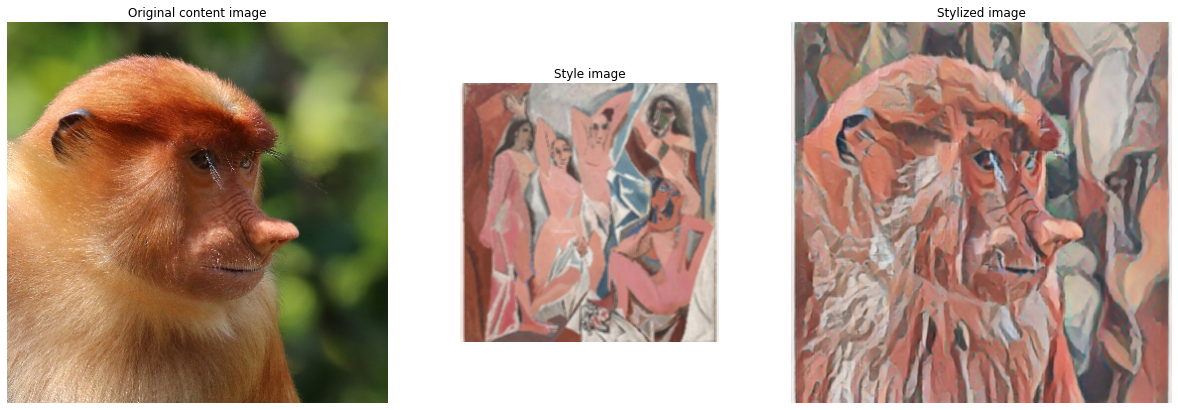

In [18]:
#@title select the content image and the style image below  { display-mode: "form" }

content_name = 'probiscis_monkey'  # @param ['mountains', 'rudbeckia', 'probiscis_monkey', 'baby_elephant', 'hoodoos', 'antelope_canyon', 'golden_gate']
style_name = 'picasso_demoiselles_avignon'  # @param ['kanagawa_great_wave', 'kandinsky_composition_7', 'hubble_pillars_of_creation', 'van_gogh_starry_night', 'turner_nantes', 'munch_scream', 'picasso_demoiselles_avignon', 'picasso_violin', 'picasso_bottle_of_rum', 'fire', 'derkovits_woman_head', 'amadeo_style_life', 'derkovtis_talig', 'amadeo_cardoso', 'picasso_portrait', 'mona_lisa', 'shipreck', 'rustic_japan']


stylized_image = hub_module(tf.constant(content_images[content_name]),
                            tf.constant(style_images[style_name]))[0]


show_n([content_images[content_name], style_images[style_name], stylized_image],
       titles=['Original content image', 'Style image', 'Stylized image'])